In [1]:
pwd

'/mmfs1/data/bergerar/BC-MRI-ADHD/Code'

In [27]:
import os 
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from make_models import get_MRI_VAE_3D,get_MRI_CVAE_3D

from tqdm import tqdm 

In [29]:
stuff = np.load('../Assets/brain_array-440.npz')
print(list(stuff.keys()))

data = stuff['data']
control = stuff['controls']
patients = stuff['patients']
n = data.shape[0]

['data', 'controls', 'patients']


In [44]:
batch_size = 32
encoder, decoder, vae = get_MRI_VAE_3D(input_shape=(64,64,64,1),
                   latent_dim=2,
                   batch_size = batch_size,
                   disentangle=False,
                   gamma=1,
                   kernel_size = 3,
                   filters = 16,
                   intermediate_dim = 128,
                   opt=None)

In [32]:
# Training
#for epoch in epochs
for i in tqdm(range(5)):
    batch_idx = np.random.randint(low=0,high=n,size=batch_size)
    data_batch = data[batch_idx,:,:,:]
    vae.train_on_batch(data_batch)

100%|██████████| 5/5 [00:33<00:00,  6.66s/it]


In [45]:
prediction = vae.predict(data_batch)

Text(0.5, 1.0, 'prediction')

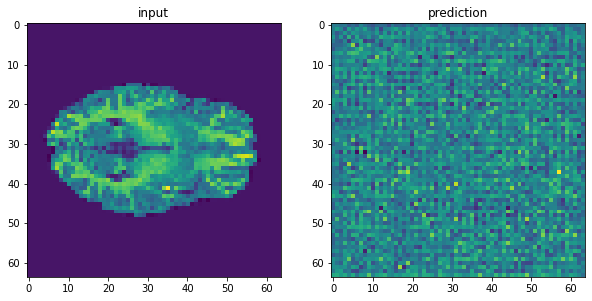

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(data_batch[0,:,:,32])
plt.title('input')
plt.subplot(1,2,2)
plt.imshow(prediction[0,:,:,32,0])
plt.title('prediction')

In [47]:
cvae, z_encoder, s_encoder, cvae_decoder = get_MRI_CVAE_3D(input_shape=(64,64,64,1),
                    latent_dim=2,
                    beta=1,
                    disentangle=False,
                    gamma=1,
                    bias=True,
                    batch_size = 64,
                    kernel_size = 3,
                    filters = 32,
                    intermediate_dim = 128,
                    opt=None)

# CVAE takes in [patients,controls]

In [48]:
data_batch_patients = data[np.random.randint(low=0,high=n,size=batch_size),:,:,:]
data_batch_control = data[np.random.randint(low=0,high=n,size=batch_size),:,:,:]

In [49]:
for i in tqdm(range(5)):
    cvae.train_on_batch([data_batch_patients,data_batch_control])

100%|██████████| 5/5 [00:58<00:00, 11.78s/it]


In [50]:
predictions = cvae.predict([data_batch_patients,data_batch_control])

Text(0.5, 1.0, 'prediction')

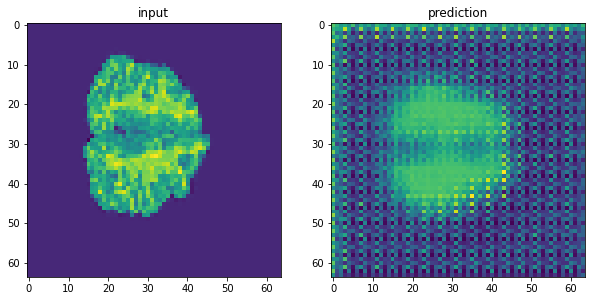

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(data_batch_patients[0,:,:,32])
plt.title('input')
plt.subplot(1,2,2)
plt.imshow(predictions[0][0,:,:,32,0])
plt.title('prediction')

In [ ]:
# Make a Data loader

#dataloader_vae.get_batch()
#dataloader_cae.get_patient_batch()
#dataloader_cae.get_control_batch()